<a href="https://www.kaggle.com/code/chandanarprasad/mbti-personality-types?scriptVersionId=100565056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('../input/mbti-personality-types-500-dataset/MBTI 500.csv')

In [3]:
df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [5]:
df.posts = df.posts.astype('string')
df.type = df.type.astype('string')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  string
 1   type    106067 non-null  string
dtypes: string(2)
memory usage: 1.6 MB


In [7]:
df.type.value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: Int64

In [8]:
intp = df[df.type=='INTP']

In [9]:
intj = df[df.type == 'INTJ']

In [10]:
entj = df[df.type == 'ENTJ']

In [11]:
intp_tf = Counter(str(intp).split(' ')).most_common(20)
intp_tf

[('', 123),
 ('want', 3),
 ('...', 3),
 ('like', 2),
 ('lover', 2),
 ('posts', 1),
 ('type\n22427', 1),
 ('watch', 1),
 ('bite', 1),
 ('everything', 1),
 ('include', 1),
 ('hentai', 1),
 ('tend', 1),
 ('enjo...', 1),
 ('INTP\n22428', 1),
 ('goal', 1),
 ('personally', 1),
 ('appeal', 1),
 ('probably', 1),
 ('wrong', 1)]

In [12]:
intj_tf = Counter(str(intj).split(' ')).most_common(20)
intj_tf

[('', 143),
 ('know', 3),
 ('music', 2),
 ('p', 2),
 ('drink', 2),
 ('...', 2),
 ('good', 2),
 ('posts', 1),
 ('type\n0', 1),
 ('intj', 1),
 ('tool', 1),
 ('use', 1),
 ('interaction', 1),
 ('people', 1),
 ('excuse', 1),
 ('a...', 1),
 ('INTJ\n1', 1),
 ('rap', 1),
 ('ehh', 1),
 ('opp', 1)]

In [13]:
entj_tf = Counter(str(entj).split(' ')).most_common(20)
entj_tf

[('', 123),
 ('...', 4),
 ('consider', 2),
 ('d...', 2),
 ('day', 2),
 ('one', 2),
 ('every', 2),
 ('posts', 1),
 ('type\n61281', 1),
 ('well', 1),
 ('freud', 1),
 ('father', 1),
 ('psychoanal...', 1),
 ('ENTJ\n61282', 1),
 ('beside', 1),
 ('point', 1),
 ('advice', 1),
 ('mourn', 1),
 ('get', 1),
 ('right', 1)]

In [14]:
types = df.groupby("type")
types.describe().head()

posts                                                               
      count unique                                                top freq
type                                                                      
ENFJ   1534   1534  yeah quite like idea actually think could numb...    1
ENFP   6167   6167  terminal chance affirmation quality touch firs...    1
ENTJ   2955   2955  well consider freud consider father psychoanal...    1
ENTP  11725  11725  much easy understand consider people automobil...    1
ESFJ    181    181  late whatever make others happy bad feel world...    1

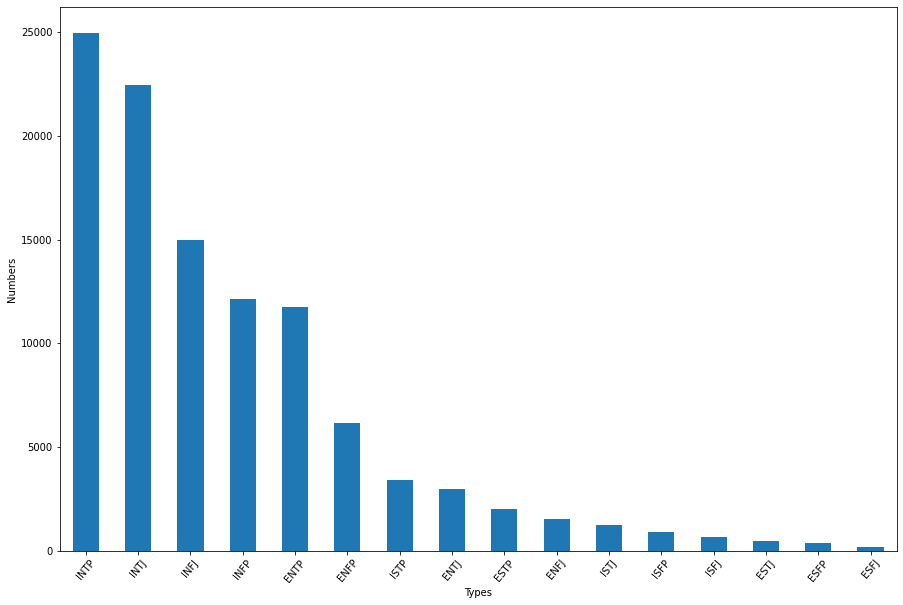

In [15]:
plt.figure(figsize=(15,10))
types.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Types")
plt.ylabel("Numbers")
plt.show()

In [16]:
?WordCloud

know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low swe

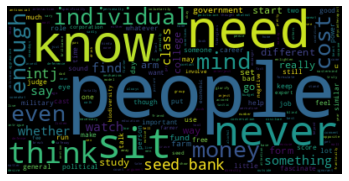

In [17]:
text = df.posts[0]
wordcloud = WordCloud().generate(text)
print(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


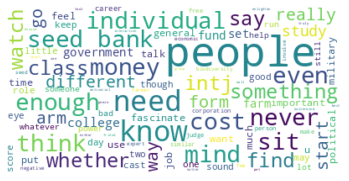

In [18]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
# Ref: https://www.datacamp.com/community/tutorials/wordcloud-python